In [3]:
!pip install plotly
import numpy as np #Operaciones matemáticas rápidas sobre matrices
import pandas as pd #biblioteca de análisis y manipulación de datos para Python
import plotly.express as px
import matplotlib.pyplot as plt #Proporciona una forma de trazado similar a MATLAB. pyplot está diseñado principalmente para gráficos interactivos y casos simples de generación de tramas programáticas. La API orientada a objetos se recomienda para gráficos más complejos.
import seaborn as sns #permite generar fácilmente elegantes gráficos, proporciona una interfaz de alto nivel que es realmente sencilla de aprender.
import statsmodels.api as sm

# Preprocesado y modelado
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('once')


#df= pd.read_csv('AT2018_NBD.csv')
df= pd.read_csv('AT2019_NBD.csv')
#df= pd.read_csv('AT2020_NBD.csv')
#df= pd.read_csv('AT2021_NBD.csv')
#df= pd.read_csv('NBD-csv.csv')
df1= pd.read_csv('AT2020_NBD.csv')
#df2= pd.read_csv('AT2021_NBD.csv')
#df3= pd.read_csv('AT2018_NBD.csv')
df=df.append(df1)
#df=df.append(df2)
#df=df.append(df3)
df.head()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,fecha,dia,hora,latitud,longitud,tipologia,direccion,zona,parroquia_urbana,causas,nro_heridos,nro_fallecidos,gravedad,vehiculos_retenidos,senalizacion_existente
0,01-01,martes,h04,-4.002271,-79.212242,estrellamiento,de los paltas y caran shiri,urbana,sucre,conducir en estado de embriaguez,0,0,NaN,NaN,NaN
1,01-01,martes,h06,-4.024814,-79.203255,estrellamiento,pio jaramillo alvarado entre benjamin franklin...,urbana,punzara,imprudencia del conductor,0,0,NaN,NaN,NaN
2,01-01,martes,h06,-3.975969,-79.227888,roce positivo,isidro ayora barrio plateado,urbana,sucre,imprudencia del conductor,2,0,NaN,NaN,NaN
3,01-01,martes,h02,-3.960426,-79.216096,choque lateral angular,8 de diciembre y belisario moreno,urbana,carigan,imprudencia del conductor,0,0,NaN,NaN,NaN
4,01-01,martes,h03,-4.000044,-79.234883,estrellamiento,integracion barrial - angel felicisimo rojas,urbana,punzara,conducir en estado de embriaguez,0,0,NaN,NaN,NaN


In [4]:
fig = px.density_mapbox(df,lat='latitud', lon='longitud',radius=3,center=dict(lat=-3.99313,lon=-79.20422),zoom=10.5,mapbox_style="open-street-map")

fig.show()

In [5]:
#verifico datos nulos
df.isnull().sum()

fecha                       0
dia                         0
hora                        0
latitud                     0
longitud                    0
tipologia                   0
direccion                   0
zona                        0
parroquia_urbana            0
causas                      0
nro_heridos                 0
nro_fallecidos              0
gravedad                  506
vehiculos_retenidos       506
senalizacion_existente    506
dtype: int64

In [6]:
df=df.loc[:,df.columns!="fecha"]
df=df.loc[:,df.columns!="zona"]
df=df.loc[:,df.columns!="latitud"]
df=df.loc[:,df.columns!="longitud"]
df=df.loc[:,df.columns!="direccion"]
df=df.loc[:,df.columns!="gravedad"]
df=df.loc[:,df.columns!="vehiculos_retenidos"]
df=df.loc[:,df.columns!="senalizacion_existente"]
df=df.loc[:,df.columns!="condicion_calzada"]
df=df.loc[:,df.columns!="condicion_atmosferica"]

In [7]:
df.isnull().sum()

dia                 0
hora                0
tipologia           0
parroquia_urbana    0
causas              0
nro_heridos         0
nro_fallecidos      0
dtype: int64

In [8]:
df.sample(10)

,dia,hora,tipologia,parroquia_urbana,causas,nro_heridos,nro_fallecidos
129,jueves,h13,estrellamiento,punzara,conducir en estado de embriaguez,0,0
422,domingo,h14,choque lateral angular,punzara,no ceder el derecho de via,1,0
226,jueves,h23,estrellamiento,sucre,imprudencia del conductor,0,0
85,lunes,h23,choque lateral perpendicular,san sebastian,no ceder el derecho de via,1,0
303,jueves,h23,choque por alcance,el sagrario,conducir en estado de embriaguez,0,0
284,martes,h16,roce negativo,punzara,no mantener la distancia reglamentaria,0,0
367,jueves,h03,perdida de carril,sucre,conducir en exceso de velocidad,0,0
126,viernes,h19,estrellamiento,sucre,conducir en exceso de velocidad,1,0
267,lunes,h21,choque lateral angular,carigan,imprudencia del conductor,0,0
425,martes,h21,atropello,carigan,imprudencia del peaton,1,0


In [9]:
df.head()

,dia,hora,tipologia,parroquia_urbana,causas,nro_heridos,nro_fallecidos
0,martes,h04,estrellamiento,sucre,conducir en estado de embriaguez,0,0
1,martes,h06,estrellamiento,punzara,imprudencia del conductor,0,0
2,martes,h06,roce positivo,sucre,imprudencia del conductor,2,0
3,martes,h02,choque lateral angular,carigan,imprudencia del conductor,0,0
4,martes,h03,estrellamiento,punzara,conducir en estado de embriaguez,0,0


In [10]:
ds=pd.DataFrame(df)
#Presenta el numero de filas
print("El numero de filas(observaciones) es: ",ds.shape[0])

#Presenta el numero de columnas
print("El numero de columnas(variables) es: ",len(ds.columns))

El numero de filas(observaciones) es:  881
El numero de columnas(variables) es:  7


In [11]:
# tipos de la variables
ds.dtypes

dia                 object
hora                object
tipologia           object
parroquia_urbana    object
causas              object
nro_heridos          int64
nro_fallecidos       int64
dtype: object

In [12]:
df.shape[0]

881

In [13]:
df['causas'].value_counts()

conducir en exceso de velocidad                   219
conducir en estado de embriaguez                  191
imprudencia del conductor                         174
no ceder el derecho de via                        109
no respetar las senales de transito                63
imprudencia del peaton                             44
no mantener la distancia reglamentaria             39
fallas mecanicas no previsibles                     8
negligencia del conductor                           8
cambio brusco e indebido de carril                  7
condiciones climaticas desfavorables                6
invadir carril de circulacion                       5
razones desconocidas                                5
no respetar las ordenes del agente de transito      1
impericia del conductor                             1
inobservancia de leyes de transito                  1
Name: causas, dtype: int64

In [14]:
print(df['causas'].unique())# datos en texto

['conducir en estado de embriaguez' 'imprudencia del conductor'
 'no ceder el derecho de via' 'conducir en exceso de velocidad'
 'cambio brusco e indebido de carril' 'fallas mecanicas no previsibles'
 'no respetar las senales de transito' 'invadir carril de circulacion'
 'imprudencia del peaton' 'no mantener la distancia reglamentaria'
 'razones desconocidas' 'condiciones climaticas desfavorables'
 'negligencia del conductor'
 'no respetar las ordenes del agente de transito'
 'impericia del conductor' 'inobservancia de leyes de transito']


In [15]:
print(df['causas'].unique())# datos en texto

['conducir en estado de embriaguez' 'imprudencia del conductor'
 'no ceder el derecho de via' 'conducir en exceso de velocidad'
 'cambio brusco e indebido de carril' 'fallas mecanicas no previsibles'
 'no respetar las senales de transito' 'invadir carril de circulacion'
 'imprudencia del peaton' 'no mantener la distancia reglamentaria'
 'razones desconocidas' 'condiciones climaticas desfavorables'
 'negligencia del conductor'
 'no respetar las ordenes del agente de transito'
 'impericia del conductor' 'inobservancia de leyes de transito']


In [16]:
df['causas']= df['causas'].apply(lambda x: 
                                    1 if x == 'conducir en estado de embriaguez' else 
                                    2 if x == 'imprudencia del conductor' else 
                                    3 if x == 'no ceder el derecho de via' else
                                    4 if x == 'conducir en exceso de velocidad' else 
                                    5 if x == 'cambio brusco e indebido de carril' else
                                    6 if x == 'fallas mecanicas no previsibles' else
                                    7 if x == 'no respetar las senales de transito' else
                                    8 if x == 'invadir carril de circulacion' else
                                    9 if x == 'imprudencia del peaton' else
                                    10 if x == 'no mantener la distancia reglamentaria' else
                                    11 if x == 'razones desconocidas' else
                                    12 if x == 'condiciones climaticas desfavorables' else
                                    13 if x == 'negligencia del conductor' else
                                    14 if x == 'no respetar las ordenes del agente de transito' else
                                    15 if x == 'impericia del conductor' else
                                    16)


In [17]:
print(df['parroquia_urbana'].unique()) # datos convertidos a numeros enteros

['sucre' 'punzara' 'carigan' 'el sagrario' 'el valle' 'san sebastian']


In [18]:
df['parroquia_urbana']= df['parroquia_urbana'].apply(lambda x: 
                                    1 if x == 'el sagrario' else 
                                    2 if x == 'san sebastian' else 
                                    3 if x == 'el valle' else
                                    4 if x == 'sucre' else 
                                    5 if x == 'punzara' else
                                    6 if x == 'carigan' else
                                    7)

In [19]:
print(df['parroquia_urbana'].unique()) # datos convertidos a numeros enteros

[4 5 6 1 3 2]


In [20]:
print(df['tipologia'].unique()) # datos convertidos a numeros enteros

['estrellamiento' 'roce positivo' 'choque lateral angular'
 'choque lateral perpendicular' 'choque frontal excentrico' 'atropello'
 'perdida de carril' 'colision' 'atipico' 'choque por alcance'
 'encunetamiento' 'arrollamiento' 'roce negativo' 'caida de pasajero'
 'rozamiento' 'choque frontal longitudinal' 'volcamiento lateral'
 'volcamiento longitudinal' 'perdida de pista' 'volcamiento'
 'choque frontal']


In [21]:
df['tipologia']= df['tipologia'].apply(lambda x: 
                                    1 if x == 'arrollamiento' else 
                                    2 if x == 'atipico' else 
                                    3 if x == 'atropello' else
                                    4 if x == 'caida de pasajero' else 
                                    5 if x == 'choque frontal' else
                                    6 if x == 'choque frontal excentrico' else
                                    7 if x == 'choque frontal longitudinal' else
                                    8 if x == 'choque lateral angular' else
                                    9 if x == 'choque lateral perpendicular' else
                                    10 if x == 'choque por alcance' else
                                    11 if x == 'colision' else
                                    12 if x == 'encunetamiento' else
                                    13 if x == 'estrellamiento' else
                                    14 if x == 'perdida de carril' else
                                    15 if x == 'perdida de pista' else
                                    16 if x == 'roce negativo' else
                                    17 if x == 'roce positivo' else
                                    18 if x == 'rozamiento' else
                                    19 if x == 'volcamiento' else
                                    20 if x == 'volcamiento lateral' else
                                    21)

In [22]:
print(df['tipologia'].unique()) # datos convertidos a numeros enteros

[13 17  8  9  6  3 14 11  2 10 12  1 16  4 18  7 20 21 15 19  5]


In [23]:
df['dia']= df['dia'].apply(lambda x: 
                                    1 if x == 'lunes' else 
                                    2 if x == 'martes' else 
                                    3 if x == 'miercoles' else
                                    4 if x == 'jueves' else 
                                    5 if x == 'viernes' else
                                    6 if x == 'sabado' else
                                    7 )

In [24]:
print(df['dia'].unique()) # datos convertidos a numeros enteros

[2 3 4 6 7 1 5]


In [25]:
df= df[df['parroquia_urbana'] <= 6]

In [26]:
df['hora']= df['hora'].apply(lambda x: 
                                    0 if x == 'h00' else
                                    1 if x == 'h01' else 
                                    2 if x == 'h02' else 
                                    3 if x == 'h03' else
                                    4 if x == 'h04' else 
                                    5 if x == 'h05' else
                                    6 if x == 'h06' else
                                    7 if x == 'h07' else
                                    8 if x == 'h08' else
                                    9 if x == 'h09' else
                                    10 if x == 'h10' else
                                    11 if x == 'h11' else
                                    12 if x == 'h12' else
                                    13 if x == 'h13' else
                                    14 if x == 'h14' else
                                    15 if x == 'h15' else
                                    16 if x == 'h16' else
                                    17 if x == 'h17' else
                                    18 if x == 'h18' else
                                    19 if x == 'h19' else
                                    20 if x == 'h20' else
                                    21 if x == 'h21' else
                                    22 if x == 'h22' else
                                    23)

In [27]:
df.head()

,dia,hora,tipologia,parroquia_urbana,causas,nro_heridos,nro_fallecidos
0,2,4,13,4,1,0,0
1,2,6,13,5,2,0,0
2,2,6,17,4,2,2,0
3,2,2,8,6,2,0,0
4,2,3,13,5,1,0,0


In [28]:
# datos aleatorios (muestra de 10 elementos)

df.sample(10)


,dia,hora,tipologia,parroquia_urbana,causas,nro_heridos,nro_fallecidos
354,3,20,8,5,2,1,0
496,6,20,14,5,4,0,0
339,1,19,9,4,2,1,0
110,2,1,18,5,2,0,0
232,6,23,13,4,1,1,0
309,3,16,1,1,14,1,0
123,7,19,13,5,1,0,0
495,7,0,14,5,4,0,0
128,2,9,10,4,2,0,0
237,6,2,18,6,1,0,0


In [29]:
X = df.iloc[:, [1,2,3,4,5,6]] # atributos de entrada seran las primeras columnas
Y = df.iloc[:,[0]] # atributos de destino

#presentacion de los atributos de entrada
X.head()

,hora,tipologia,parroquia_urbana,causas,nro_heridos,nro_fallecidos
0,4,13,4,1,0,0
1,6,13,5,2,0,0
2,6,17,4,2,2,0
3,2,8,6,2,0,0
4,3,13,5,1,0,0


In [30]:
#presentacion de los atributos de destino
Y.head()

,dia
0,2
1,2
2,2
3,2
4,2


Dividimos nuestros datos en las tablas de testing y training
"X_train" y "y_train", seran para crear el modelo.

"X_test" y "y_test" serviran para saber
que tan bien predice el modelo.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)# stratify=y
print('Son {} datos para entrenamiento y {} datos para prueba'.format(X_train.shape[0], X_test.shape[0]))

Son 704 datos para entrenamiento y 177 datos para prueba


Me muestra la información de la tabla de entrenamiento

In [32]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 704 entries, 66 to 175
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   hora              704 non-null    int64
 1   tipologia         704 non-null    int64
 2   parroquia_urbana  704 non-null    int64
 3   causas            704 non-null    int64
 4   nro_heridos       704 non-null    int64
 5   nro_fallecidos    704 non-null    int64
dtypes: int64(6)
memory usage: 38.5 KB


In [33]:
#Cargamos la libreria DecisionTreeClasifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix


#Llamamos al constructor del arbol de decision
classifier = DecisionTreeClassifier(max_depth=3,criterion = 'entropy')

#Entrenamos el modelo
arbol_modelo = classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

Creamos la figura del arbol

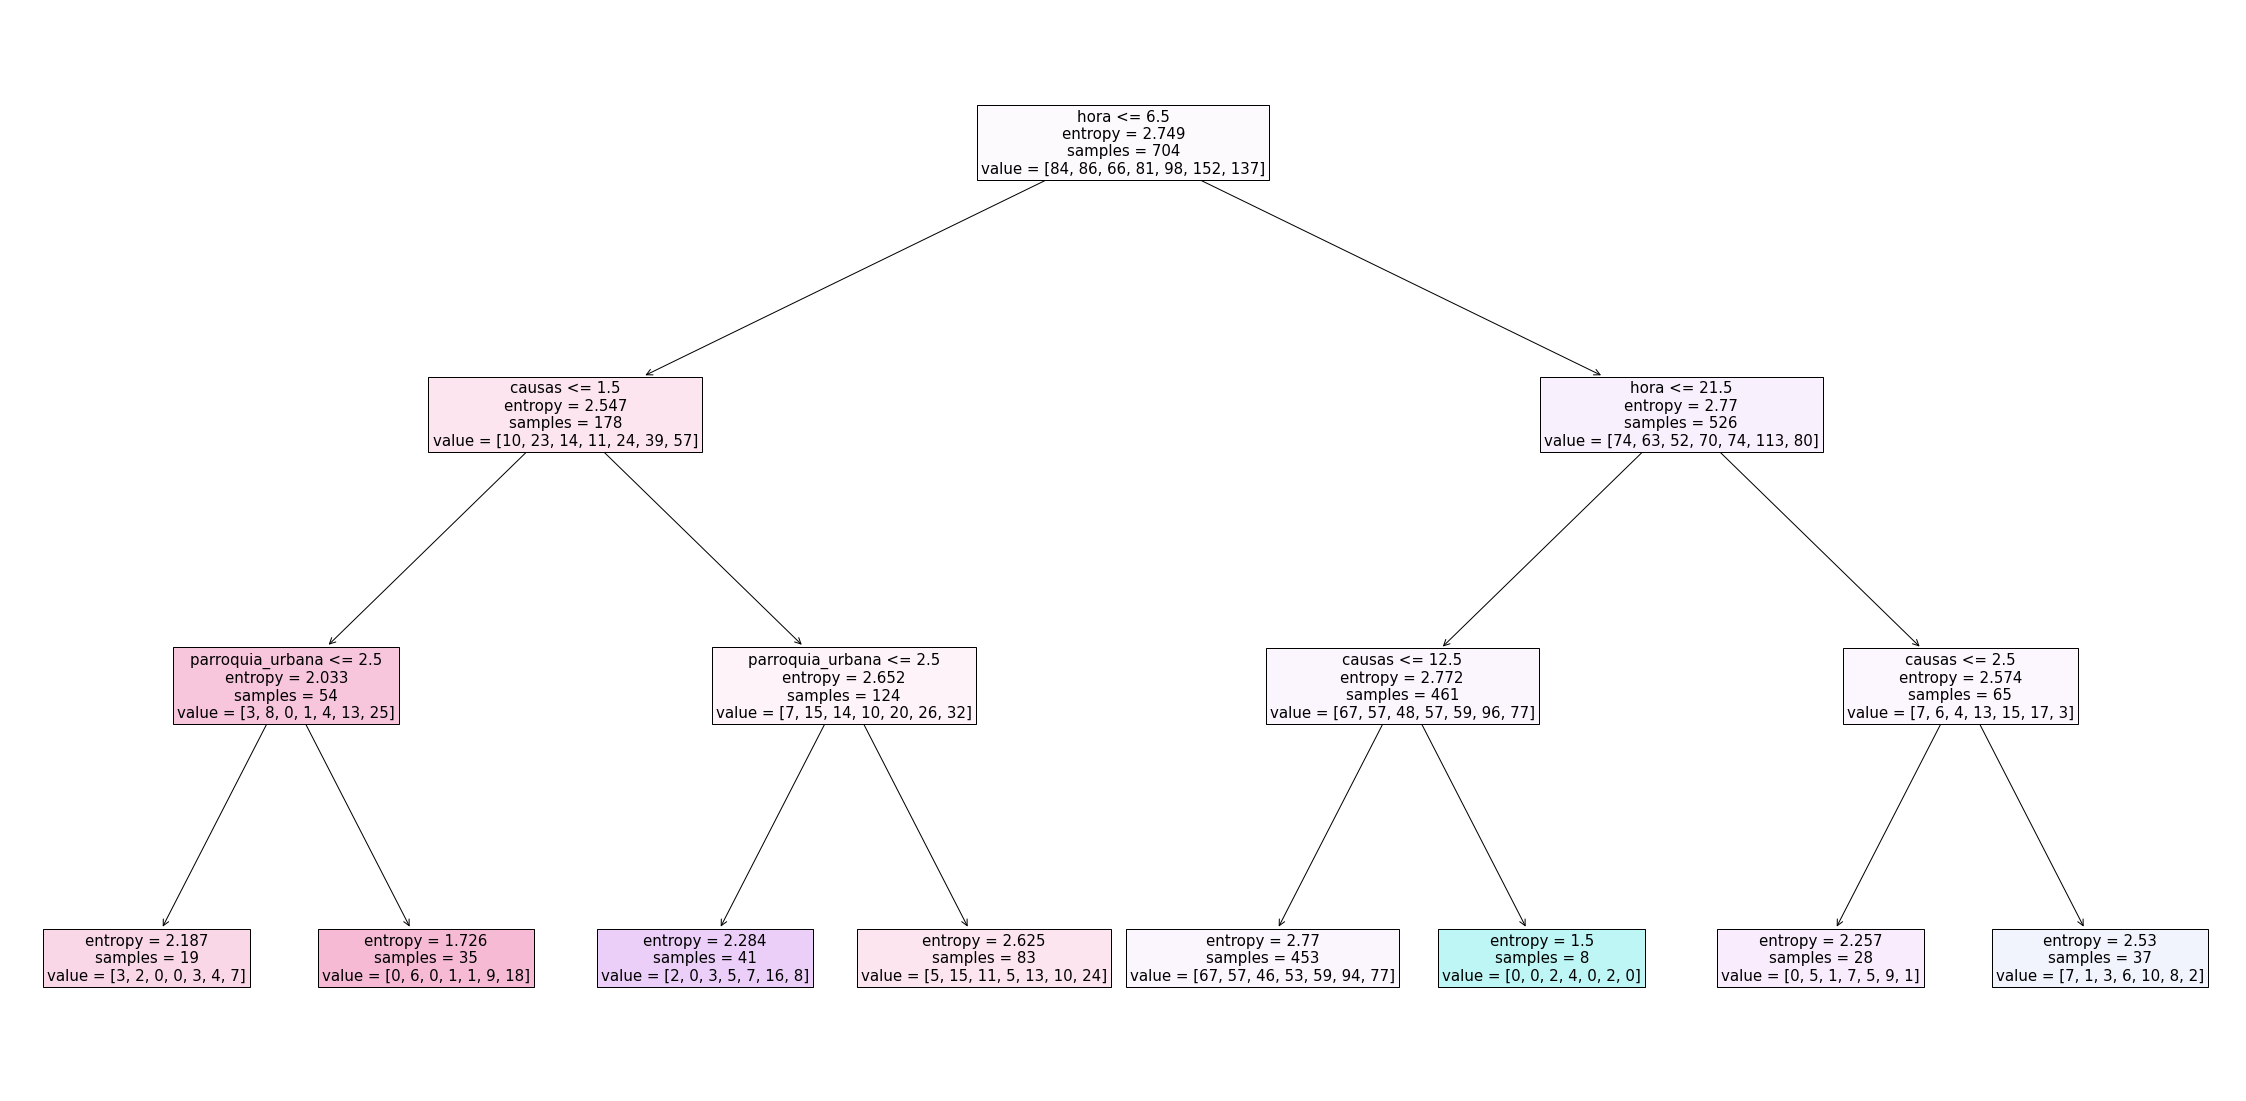

In [34]:
figura_arbol = plt.figure(figsize=(40,20)) # Le indicamos las dimensiones que queremos que tenga
plot_tree(arbol_modelo,feature_names=X.columns,filled=True, fontsize=15)
plt.show()

In [35]:
figura_arbol.savefig("arbol_colab_dia_p1.png")

In [50]:
# Resumen de las predicciones hechas por el clasificador
from sklearn import metrics
reporte = metrics.classification_report(y_test, y_pred,output_dict=True)
pre = pd.DataFrame(reporte).transpose()
print(pre)
pre.to_excel("resumen_precision_dia_p1.xlsx")

              precision    recall  f1-score     support
1              0.000000  0.000000  0.000000   26.000000
2              0.000000  0.000000  0.000000   17.000000
3              0.000000  0.000000  0.000000   24.000000
4              1.000000  0.040000  0.076923   25.000000
5              0.000000  0.000000  0.000000   22.000000
6              0.181818  0.685714  0.287425   35.000000
7              0.250000  0.285714  0.266667   28.000000
accuracy       0.186441  0.186441  0.186441    0.186441
macro avg      0.204545  0.144490  0.090145  177.000000
weighted avg   0.216744  0.186441  0.109885  177.000000


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [37]:
y_test.head()

,dia
46,7
4,3
467,3
147,3
362,7


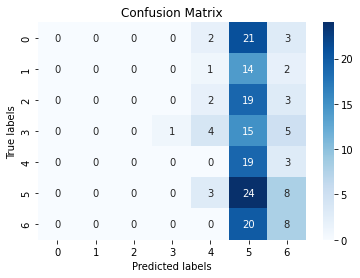

In [38]:
#Matriz de confusion
matriz=confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(matriz, annot=True, cmap="Blues",fmt='g');
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

In [39]:
cm = confusion_matrix(y_test, y_pred)

mc= pd.DataFrame(cm)
print(mc)
mc.to_excel("matriz_confusion_dia_p1.xlsx")

   0  1  2  3  4   5  6
0  0  0  0  0  2  21  3
1  0  0  0  0  1  14  2
2  0  0  0  0  2  19  3
3  0  0  0  1  4  15  5
4  0  0  0  0  0  19  3
5  0  0  0  0  3  24  8
6  0  0  0  0  0  20  8


In [40]:
#Para concatenar variables
import pandas as pd

prediccion = pd.DataFrame(y_pred,columns=['dia_prediccion'])
original = y_test
original.reset_index(drop=True, inplace=True)
df_combined = pd.concat([prediccion,original], axis=1)
#sns.countplot(x='tipologia', hue='tipologia_prediccion', data=df_combined)
df_combined.head(10)


,dia_prediccion,dia
0,7,7
1,6,3
2,5,3
3,6,3
4,6,7
5,6,2
6,6,5
7,6,1
8,6,2
9,6,5


In [41]:
# Precisión
from sklearn.metrics import accuracy_score, recall_score, precision_score
print('Exactitud árboles de decisión: ',accuracy_score(y_pred,y_test)*100)
print('Exhaustividad árboles de decisión: ', recall_score(y_pred,y_test,average='micro')*100)
print('Precision árboles de decisión: ',accuracy_score(y_pred,y_test)*100)

Exactitud árboles de decisión:  18.64406779661017
Exhaustividad árboles de decisión:  18.64406779661017
Precision árboles de decisión:  18.64406779661017


In [42]:
#transformar datos para visualización de variables predictoras y originales
df_combined['dia']= df_combined['dia'].apply(lambda x: 
                                    'lunes' if x == 1 else 
                                    'martes' if x == 2 else 
                                    'miercoles' if x == 3 else
                                    'jueves' if x == 4 else 
                                    'viernes' if x == 5 else
                                    'sabado' if x == 6 else
                                    'domingo' )

df_combined['dia_prediccion']= df_combined['dia_prediccion'].apply(lambda x: 
                                    'lunes' if x == 1 else 
                                    'martes' if x == 2 else 
                                    'miercoles' if x == 3 else
                                    'jueves' if x == 4 else 
                                    'viernes' if x == 5 else
                                    'sabado' if x == 6 else
                                    'domingo' )


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



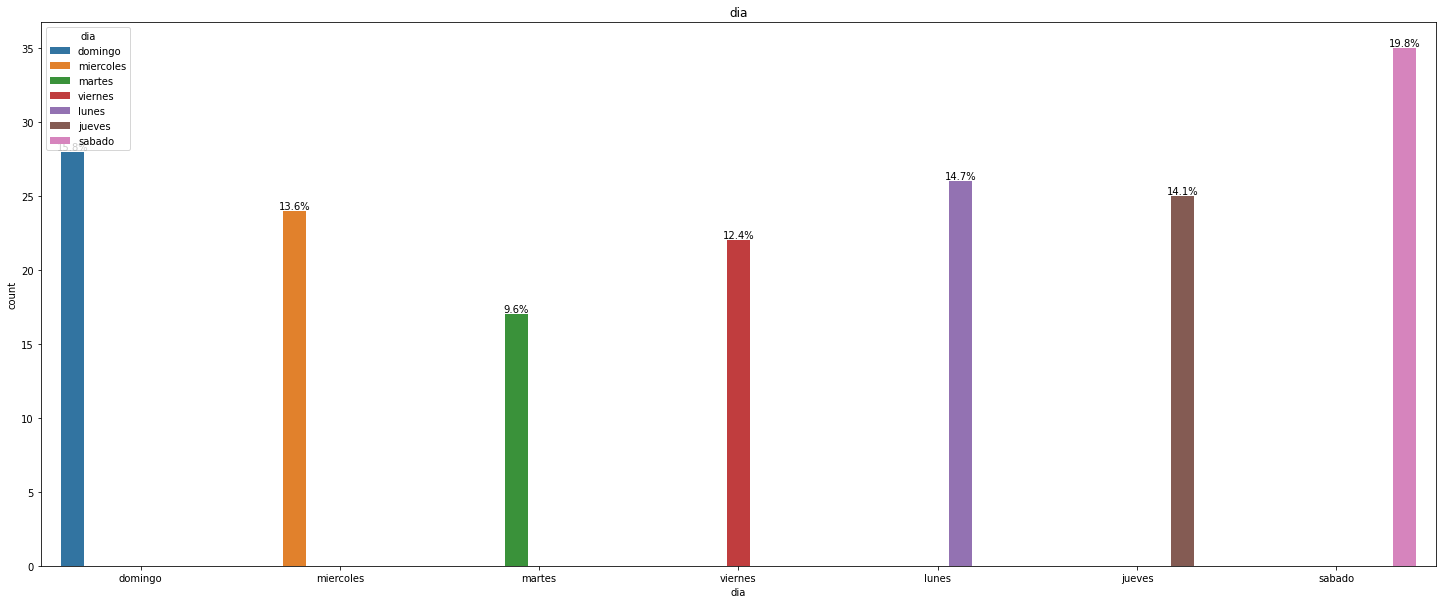

In [43]:
import seaborn as sns #permite generar fácilmente elegantes gráficos, proporciona una interfaz de alto nivel que es realmente sencilla de aprender.
ax = plt.subplots(figsize = (25,10))
ncount=len(df_combined)
#ax[1].plot(df['dia'],df['hora'],color = 'tab:purple')
sns.countplot('dia',hue = 'dia', data = df_combined, ax = ax[1]) #Muestre el conteo de observaciones en cada contenedor categórico usando barras.
ax[1].set_title('dia')



for p in ax[1].patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax[1].annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



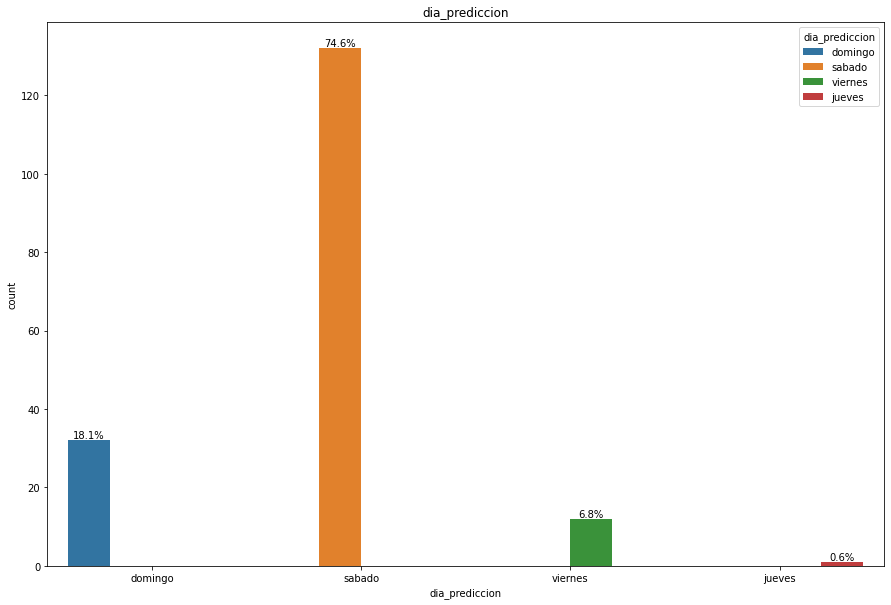

In [44]:
ax = plt.subplots(figsize = (15,10))
ncount=len(df_combined)
sns.countplot('dia_prediccion',hue = 'dia_prediccion', data = df_combined, ax = ax[1]) #Muestre el conteo de observaciones en cada contenedor categórico usando barras.
ax[1].set_title('dia_prediccion')


for p in ax[1].patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax[1].annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text